In [3]:
%matplotlib inline

In [53]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform

import networkx as nx

DataFrame returns a table like data format

In [10]:
data=pd.DataFrame(np.random.randn(6,4), index=list('123456'), columns=list('ABCD'))
data

,A,B,C,D
1,0.207311,-0.945989,0.488309,0.198083
2,-1.533482,-1.683150,1.656250,0.684431
3,-0.294305,-0.806522,0.861940,2.004314
4,0.067318,0.393742,1.088052,-0.439445
5,0.365503,-0.639364,-0.643751,2.584078
6,-1.176869,-1.099096,-1.471023,0.867743


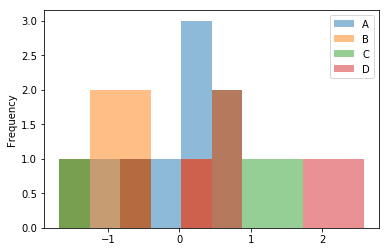

In [11]:
data.plot.hist(alpha=0.5)

I can calculate the correlations

In [12]:
distance = lambda rowa, rowb: (rowa - rowb).abs().sum() / len(rowa)

In [14]:
data.apply(lambda rowa: data.apply(lambda rowb: distance(rowa, rowb)))

,A,B,C,D
A,0.000000,0.537375,1.158519,1.549285
B,0.537375,0.000000,1.252131,2.057660
C,1.158519,1.252131,0.000000,1.583085
D,1.549285,2.057660,1.583085,0.000000


In [17]:
pdistsci = pdist(data.values, metric='euclidean')
DistMatrix = squareform(pdistsci)

In [19]:
data.values

array([[ 0.20731141, -0.94598913,  0.48830863,  0.19808322],
       [-1.5334825 , -1.68315039,  1.65625024,  0.68443063],
       [-0.29430495, -0.806522  ,  0.86194035,  2.00431378],
       [ 0.06731836,  0.3937419 ,  1.08805171, -0.43944483],
       [ 0.36550289, -0.6393642 , -0.64375062,  2.58407835],
       [-1.17686944, -1.09909634, -1.47102294,  0.86774286]])

I want to test the pdist function in scipy

In [32]:
distdata=np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
print distdata

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


In [39]:
squareform( pdist(distdata, metric='euclidean') )

array([[ 0.,  2.,  4.],
       [ 2.,  0.,  2.],
       [ 4.,  2.,  0.]])

Seems to be working as the distances 

In [40]:
squareform( pdist(data.values, metric='euclidean') )

array([[ 0.        ,  2.2747289 ,  1.91654365,  1.60642805,  2.66337648,
         2.49536023],
       [ 2.2747289 ,  0.        ,  2.16265071,  2.90895008,  3.68704496,
         3.20651414],
       [ 1.91654365,  2.16265071,  0.        ,  2.75580974,  1.7511483 ,
         2.756634  ],
       [ 1.60642805,  2.90895008,  2.75580974,  0.        ,  3.64651257,
         3.46903041],
       [ 2.66337648,  3.68704496,  1.7511483 ,  3.64651257,  0.        ,
         2.49408361],
       [ 2.49536023,  3.20651414,  2.756634  ,  3.46903041,  2.49408361,
         0.        ]])

In [41]:
pd.DataFrame(squareform( pdist(data.values, metric='euclidean') ), index=list('123456'), columns=list('123456'))

,1,2,3,4,5,6
1,0.000000,2.274729,1.916544,1.606428,2.663376,2.495360
2,2.274729,0.000000,2.162651,2.908950,3.687045,3.206514
3,1.916544,2.162651,0.000000,2.755810,1.751148,2.756634
4,1.606428,2.908950,2.755810,0.000000,3.646513,3.469030
5,2.663376,3.687045,1.751148,3.646513,0.000000,2.494084
6,2.495360,3.206514,2.756634,3.469030,2.494084,0.000000


I can select the first two cols

In [49]:
pd.DataFrame(data[['A','B']].values,index=list('123456'),columns=list('AB'))

,A,B
1,0.207311,-0.945989
2,-1.533482,-1.683150
3,-0.294305,-0.806522
4,0.067318,0.393742
5,0.365503,-0.639364
6,-1.176869,-1.099096


In [51]:
pd.DataFrame(squareform( pdist(data[['A','B']].values, metric='euclidean') ), index=list('123456'), columns=list('123456'))

,1,2,3,4,5,6
1,0.000000,1.890442,0.520644,1.347025,0.345027,1.392623
2,1.890442,0.000000,1.517906,2.622221,2.166941,0.684319
3,0.520644,1.517906,0.000000,1.253557,0.680653,0.929796
4,1.347025,2.622221,1.253557,0.000000,1.075278,1.943340
5,0.345027,2.166941,0.680653,1.075278,0.000000,1.609430
6,1.392623,0.684319,0.929796,1.943340,1.609430,0.000000


Practice flatten

In [52]:
data.values.flatten()

array([ 0.20731141, -0.94598913,  0.48830863,  0.19808322, -1.5334825 ,
       -1.68315039,  1.65625024,  0.68443063, -0.29430495, -0.806522  ,
        0.86194035,  2.00431378,  0.06731836,  0.3937419 ,  1.08805171,
       -0.43944483,  0.36550289, -0.6393642 , -0.64375062,  2.58407835,
       -1.17686944, -1.09909634, -1.47102294,  0.86774286])

Combine with NetworkX

In [61]:
r = np.random.RandomState(seed=5)
ints = r.randint(1, 10, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df['a'] = a
df['b'] = b
df

,weight,cost,a,b
0,4,7,A,D
1,7,1,B,A
2,9,5,C,E


In [62]:
G=nx.from_pandas_dataframe(df, 'a', 'b', ['weight', 'cost'])
print G['E']['C']['weight'], G['E']['C']['cost']


9 5
